In [1]:
from platform import python_version
import cv2
import torch
import torchvision
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !curl http://optipng.sourceforge.net/pngtech/img/lena.png --output data/lena.png

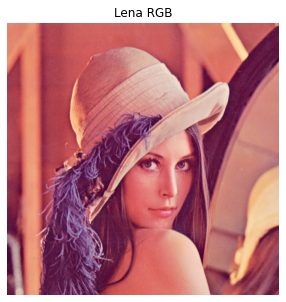

In [3]:
img = cv2.imread('data/lena.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))
plt.title('Lena RGB')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

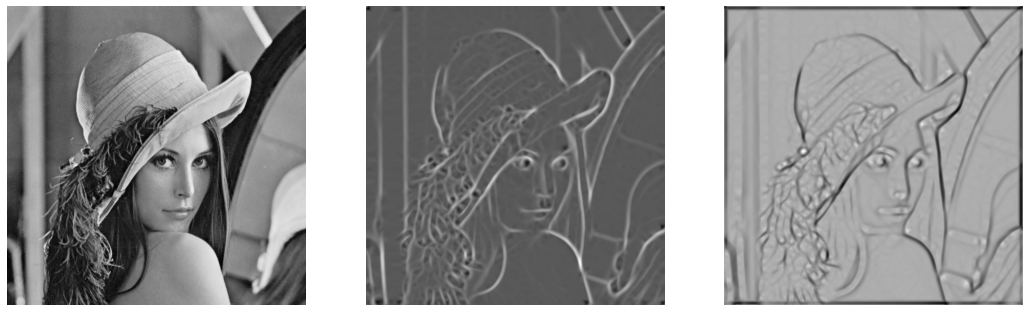

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_blur = cv2.blur(img_gray, ksize=(5, 5))

# Определяется только для 2-D и 3-D изображений. Почти равен фильтру Франджи, но использует альтернативный метод сглаживания.
# Вычисляет собственные векторы гессиана для вычисления сходства области изображения с сосудами

H_elems = hessian_matrix(img_gray_blur, sigma=3.0, order='rc')
black, white = hessian_matrix_eigvals(H_elems)

fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(15,15))

ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(black, cmap='gray')
ax[2].imshow(white, cmap='gray')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
plt.show()